# Chemical Speciation Defines Ammonia-Oxidizer Distribution in Yellowstone Hot Springs
### Katelyn Weeks, Elizabeth Trembath-Reichert, Jordyn Robare, R. Vince Debes II, Alta E.G. Howells, Everett Shock



### Introduction

Availability of chemical energy supplies is fundamental to microbial ecology for the characterization of its influence on microbial community composition and function, as well as for investigating the habitability of planetary bodies. The hot springs of Yellowstone National Park (YNP) provide a testing ground for investigating the influence of chemical energy supplies on the presence and abundance of microbial inhabitants. 


### Getting Started

Let's take a subset of geochemical data for Yellowstone National Park hot springs collected by the Group Exploring Organic Processes in Geochemistry (GEOPIG) under the research permit #YELL-5434 and calculate the energy supplies available for key microbial metabolisms including total sulfide oxidation, total dissolved ammonia oxidation, iron oxidation to goethite, hydrogen oxidation, and sulfate reduction with $H_2$.

# Part 1. Let's calculate the energy supplies for the 63 hot spring samples included in Figure 1!

In [3]:
#Loading the required packages
import pandas as pd
import AqEquil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ae = AqEquil.AqEquil(exclude_organics = True)

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data.csv
wrm_data.csv is now set as the active thermodynamic database.
This database is meant for calculations between 0 and 1000 °C and up to 5 kb pressure.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk_s.csv


In [4]:
#These compounds need to be suppressed in our calculations
suppress_list = ['CN-', 'N2', 'N2O2-2', 'N2H5+', 'Fe+3', 'S3-2', 'S5-2', 'S2O3-2', 'S2-2', 'SCN-', 'SO3-2', 'HSO5-']

In [3]:
#Performing speciation calculations on the data used for Figure1
speciation = ae.speciate(input_filename = "Figure1_Data_Input.csv",
                         exclude = ["ID", "Year","Ti+4"],
                         #suppress=["acetic-acid", "formic-acid"],
                         aq_dist_type="molality",
                         report_filename = 'Fig1_Data_Speciation_Report.csv')

Getting wrm_data.csv ready. This will take a moment...
Using wrm_data.csv to speciate 090723G
Using wrm_data.csv to speciate 120724SD
Using wrm_data.csv to speciate 120724SC
Using wrm_data.csv to speciate 120719SV
Using wrm_data.csv to speciate 120715SZ
Using wrm_data.csv to speciate 120715SA
Using wrm_data.csv to speciate 140805TM
Using wrm_data.csv to speciate 140805SY
Using wrm_data.csv to speciate 140805SX
Using wrm_data.csv to speciate 140803TZ
Using wrm_data.csv to speciate 140803SO
Using wrm_data.csv to speciate 140803SJ
Using wrm_data.csv to speciate 140803SI
Using wrm_data.csv to speciate 140803SH
Using wrm_data.csv to speciate 140803FN
Using wrm_data.csv to speciate 140802TX
Using wrm_data.csv to speciate 140802TT
Using wrm_data.csv to speciate 140802TS
Using wrm_data.csv to speciate 140802TR
Using wrm_data.csv to speciate 140802SD
Using wrm_data.csv to speciate 140731TP
Using wrm_data.csv to speciate 140731ST
Using wrm_data.csv to speciate 140731SS
Using wrm_data.csv to spec

## Yay! Our data has been speciated. Let's look at all of the chemotrophic reactions that we can calculate the energy supplies for!

In [4]:
#Setting up the 133 chemotrophic reactions used to calculate energy supplies
speciation.make_redox_reactions()

,redox_pairs,reaction
reaction_name,,
rxn_0_3,"[0, 3]",3 pyrite + SO4-2 + 8 H+ = 3 Fe+2 + 7 sulfur + 4 H2O
rxn_3_0,"[3, 0]",3 Fe+2 + 7 sulfur + 4 H2O = 3 pyrite + SO4-2 + 8 H+
rxn_0_4,"[0, 4]",3 H2S + SO4-2 + 2 H+ = 4 sulfur + 4 H2O
rxn_4_0,"[4, 0]",4 sulfur + 4 H2O = 3 H2S + SO4-2 + 2 H+
rxn_0_5,"[0, 5]",3 Fe+2 + 6 H2S + SO4-2 = 3 pyrite + sulfur + 4 H2O + 4 H+
rxn_5_0,"[5, 0]",3 pyrite + sulfur + 4 H2O + 4 H+ = 3 Fe+2 + 6 H2S + SO4-2
rxn_0_6,"[0, 6]",6 magnetite + 8 H2O + SO4-2 + 2 H+ = 18 goethite + sulfur
rxn_6_0,"[6, 0]",18 goethite + sulfur = 6 magnetite + 8 H2O + SO4-2 + 2 H+
rxn_0_7,"[0, 7]",6 Fe+2 + 8 H2O + SO4-2 = 6 goethite + sulfur + 10 H+


## Let's calculate and create a spreadsheet for our energy supplies!

In [5]:
#Calculating the energy supply for the above 133 chemotrophic reaction
df = speciation.apply_redox_reactions(y_type='E',
                                      y_units='J')
#Creating a '.csv' of the energy supply results
df.to_csv("Figure1_Energy_Report.csv")

IntProgress(value=0, max=300)

### Selecting the energy supplies of interest and formatting the data frame

In [6]:
# Creating a data frame that only includes the 5 chemotrophic reactions included in Figure 1
df = pd.read_csv("Figure1_Energy_Report.csv")
Microbially_Relevant_Reactions = df[['rxn_17_2 energy supply', 'rxn_2_18 energy supply', 'rxn_17_16 energy supply', 'rxn_17_18 energy supply', 'rxn_17_7 energy supply']]

# Naming the reactions
Microbially_Relevant_Reactions = Microbially_Relevant_Reactions.rename(columns={
    'rxn_17_2 energy supply': 'Total Sulfide Oxidation',
    'rxn_2_18 energy supply': 'Sulfate Reduction with H2',
    'rxn_17_16 energy supply': 'Total Dissolved Ammonia Oxidation',
    'rxn_17_18 energy supply': 'Hydrogen Oxidation',
    'rxn_17_7 energy supply': 'Iron Oxidation to Goethite'
})

#Looking at the head of the file
Microbially_Relevant_Reactions.head()


,Total Sulfide Oxidation,Sulfate Reduction with H2,Total Dissolved Ammonia Oxidation,Hydrogen Oxidation,Iron Oxidation to Goethite
0,J/kg fluid,J/kg fluid,J/kg fluid,J/kg fluid,J/kg fluid
1,2.1823637867432004,0.0055602467839644615,31.106496029501407,0.05464595243611851,0.599697466455325
2,0.7338682307998274,0.001388385113372401,6.06236611100154,0.019184787419726512,0.01754185133508202
3,0.43204738219347555,0.0018448509184729,2.230028949652586,0.023023644163251113,0.036918347871433665
4,1.338510273928369,0.0028778039380578787,1.9269831206770043,0.01879448051809569,0.023551685976954152


In [7]:
# Use pd.melt to convert the dataframe from wide to long form. This is required for creating a violin plot.
Microbially_Relevant_Reactions_long = pd.melt(
    Microbially_Relevant_Reactions, 
    var_name='Reaction',  # The new column that will hold the original column names
    value_name='Energy Supply (J/kg)'    # The new column that will hold the values
)

# Display the transformed dataframe
# Convert 'Value' column to numeric, converting strings to NaN
Microbially_Relevant_Reactions_long['Energy Supply (J/kg)'] = pd.to_numeric(Microbially_Relevant_Reactions_long['Energy Supply (J/kg)'], errors='coerce')

# Drop rows with NaN values in the 'Value' column (which were originally strings)
Microbially_Relevant_Reactions_long_cleaned = Microbially_Relevant_Reactions_long.dropna(subset=['Energy Supply (J/kg)'])

# Display the cleaned DataFrame
print(Microbially_Relevant_Reactions_long_cleaned)

                       Reaction  Energy Supply (J/kg)
1       Total Sulfide Oxidation              2.182364
2       Total Sulfide Oxidation              0.733868
3       Total Sulfide Oxidation              0.432047
4       Total Sulfide Oxidation              1.338510
5       Total Sulfide Oxidation              0.298482
..                          ...                   ...
315  Iron Oxidation to Goethite              0.018269
316  Iron Oxidation to Goethite              1.556224
317  Iron Oxidation to Goethite              0.399729
318  Iron Oxidation to Goethite              0.147386
319  Iron Oxidation to Goethite              1.165284

[315 rows x 2 columns]


In [9]:
# Convert 'Value' column to numeric, forcing errors to NaN
Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'] = pd.to_numeric(Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'], errors='coerce')

# Now apply log10 transformation, ignoring any NaN values
Microbially_Relevant_Reactions_long_cleaned['Log_Energy Supply (J/kg)'] = np.log10(Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'])

# Display the updated dataframe to check for any NaN entries
print(Microbially_Relevant_Reactions_long_cleaned.head())


                  Reaction  Energy Supply (J/kg)  Log_Energy Supply (J/kg)
1  Total Sulfide Oxidation              2.182364                  0.338927
2  Total Sulfide Oxidation              0.733868                 -0.134382
3  Total Sulfide Oxidation              0.432047                 -0.364469
4  Total Sulfide Oxidation              1.338510                  0.126622
5  Total Sulfide Oxidation              0.298482                 -0.525082


/tmp/ipykernel_2620871/3020748514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'] = pd.to_numeric(Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'], errors='coerce')
/tmp/ipykernel_2620871/3020748514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Microbially_Relevant_Reactions_long_cleaned['Log_Energy Supply (J/kg)'] = np.log10(Microbially_Relevant_Reactions_long_cleaned['Energy Supply (J/kg)'])


# Figure 1
### Time to make figure 1. Let's compare some relavent chemotrophic energy supplies using a violin plot. 

### First we need to cut down our data to the chemotrophic reactions we care about. Then, we will need to "melt" our data to get it in the proper format for making a violin plot. The violin plot will be made using MatPlot Lib and Seaborn, but Rstudio and ggplot2 were used for Weeks et al., 2024.

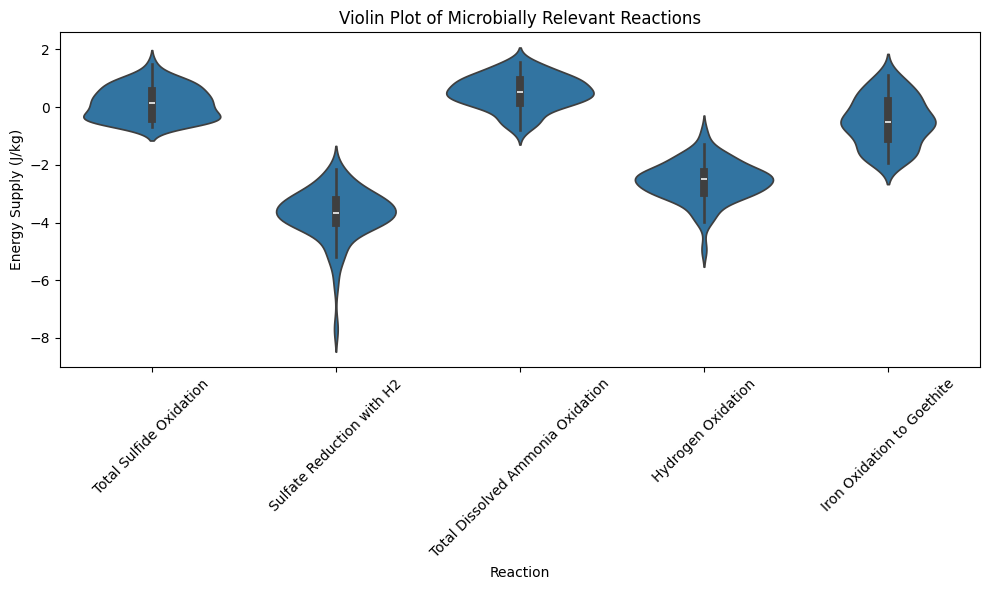

In [10]:
# Create the violin plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.violinplot(x='Reaction', y='Log_Energy Supply (J/kg)', data=Microbially_Relevant_Reactions_long_cleaned)

# Add title and labels
plt.title('Violin Plot of Microbially Relevant Reactions')
plt.xlabel('Reaction')
plt.ylabel('Energy Supply (J/kg)')

# Show the plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout for better fitting
plt.show()


# Part 2. Is the high energy supply for total dissolved ammonia oxidation reflected in the distribution of the known AOA (*Ca. Nitrosocaldus yellowstonensis*) among YNP hot springs?

We need to calculate the energy supply for total dissolved ammonia oxidation for the samples included for which we have 16S rRNA gene amplicon data. The relative abundances of *Ca. Nitrosocaldus yellowstonensis* have already been calculated and are included in the data input file in the column titled "AOA RA".

In [11]:
#Reloading required packages. 
import pandas as pd
import AqEquil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ae = AqEquil.AqEquil(exclude_organics = True)

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data.csv
wrm_data.csv is now set as the active thermodynamic database.
This database is meant for calculations between 0 and 1000 °C and up to 5 kb pressure.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk_s.csv


In [12]:
suppress_list = ['CN-', 'N2', 'N2O2-2', 'N2H5+', 'Fe+3', 'S3-2', 'S5-2', 'S2O3-2', 'S2-2', 'SCN-', 'SO3-2', 'HSO5-']

In [5]:
speciation_of_Fig2_Data = ae.speciate(input_filename = "Figure2_Data_Input.csv",
                         exclude = ["Sample", "Year", "AOA", "DOC", "AOA RA"],
                         #suppress=["acetic-acid", "formic-acid"],
                         aq_dist_type="molality",
                         report_filename = 'Figure2_Data_Speciation_Report.csv')

Getting wrm_data.csv ready. This will take a moment...
Using wrm_data.csv to speciate 140724SC
Using wrm_data.csv to speciate 140724SD
Using wrm_data.csv to speciate 140724SE
Using wrm_data.csv to speciate 140725SI
Using wrm_data.csv to speciate 140725SJ
Using wrm_data.csv to speciate 140725SK
Using wrm_data.csv to speciate 140725SL
Using wrm_data.csv to speciate 140726SO
Using wrm_data.csv to speciate 140726SP
Using wrm_data.csv to speciate 140726SQ
Using wrm_data.csv to speciate 140726SR
Using wrm_data.csv to speciate 140727SU
Using wrm_data.csv to speciate 140727SV
Using wrm_data.csv to speciate 140727SW
Using wrm_data.csv to speciate 140727SX
Using wrm_data.csv to speciate 140727SY
Using wrm_data.csv to speciate 140727SZ
Using wrm_data.csv to speciate 140729SD
Using wrm_data.csv to speciate 140729SE
Using wrm_data.csv to speciate 140730SI
Using wrm_data.csv to speciate 140730SJ
Using wrm_data.csv to speciate 140730SK
Using wrm_data.csv to speciate 140730SL
Using wrm_data.csv to spe

In [6]:
#Saving the speciation product
speciation_of_Fig2_Data.save("Total_Ammonia_Oxidation_Speciation")

Saved as 'Total_Ammonia_Oxidation_Speciation.speciation'


In [15]:
#Performing the energy supply calculation for total dissolved ammonia oxidation only
df = speciation_of_Fig2_Data.calculate_energy(
        y_type = "E",
        y_units = "J",
        species = ["NH4+", "O2", "H+", "H2O", "NO2-"],
        stoich = [-1, -1.5, 2, 1, 1],
        as_written = False,
        rxn_name = "Total Dissolved Ammonia Oxidation (J/kg)")

In [16]:
#Print energy calculations to a csv
df.to_csv("Figure2_Energy_Report.csv")

In [17]:
#Combining energy report with initial input data for ease of plotting

#Reading in files
Figure_2_Energy_Report = pd.read_csv("Figure2_Energy_Report.csv")
Figure2_Data_Speciation = pd.read_csv("Figure2_Data_Speciation_Report.csv")

#Merging data files
Figure_2_Data_Combined = pd.merge(Figure_2_Energy_Report, Figure2_Data_Speciation , on='Sample')
Figure_2_Data_Combined.to_csv("Figure_2_Data_Combined.csv")

#Viewing the head of the new dataframe
Figure_2_Data_Combined.head()

,Sample,Total Dissolved Ammonia Oxidation (J/kg) energy supply,Total Dissolved Ammonia Oxidation (J/kg) limiting reactant,Year,AOA,AOA RA,Temperature,Pressure,pH_(input),HCO3-_(input),...,Mg+2_total,Na+_total,NH4+_total,NO2-_total,NO3-_total,O2_total,OH-_total,PO4-3_total,SiO2_total,SO4-2_total
0,NaN,J/kg fluid,limiting reactant,NaN,Yes/No,NaN,degC,bar,pH,Molality,...,molality,molality,molality,molality,molality,molality,molality,molality,molality,molality
1,140724SC,6.545456775131838,NH4+,2014.0,Yes,3.137337,50.0,1.0,7.993,0.000425,...,6.41e-06,0.0145001,2.29e-05,1.7e-07,1.77e-07,8.13e-05,8.77719e-06,1.24e-07,5.51e-06,0.00110446
2,140724SD,6.864535192950413,NH4+,2014.0,Yes,1.321815,54.8,1.0,7.745,0.000471,...,6.79e-06,0.0142611,2.43e-05,2.08e-07,2.42e-07,7.19e-05,NaN,1.71e-07,5.31e-06,0.00110134
3,140724SE,5.569551870110064,NH4+,2014.0,Yes,5.339491,70.2,1.0,7.13,0.00049,...,6.63e-06,0.0139516,1.99e-05,4.62e-08,1.16e-07,7.5e-05,NaN,NaN,4.41e-06,0.00107501
4,140725SI,0.9262215973875649,NH4+,2014.0,Yes,0.156292,59.2,1.0,9.034,0.00031,...,NaN,0.0136697,3.19e-06,1.55e-07,9.35e-08,7.5e-05,0.000147977,1.34e-07,7.97e-06,0.000173258


In [19]:
#Formatting the data frame

#Removing the first row so we are only including headers and values
Figure_2_Data_Combined = Figure_2_Data_Combined.iloc[1:]

# List of columns to convert to float
columns = ['pH_(input)', 'O2_(input)', 'Temperature', 'NH3', 'NH4+', 'NH4+_(input)', 'Total Dissolved Ammonia Oxidation (J/kg) energy supply']

# Convert the selected columns to floats
for c in columns:
    Figure_2_Data_Combined[c] = Figure_2_Data_Combined[c].astype(float)

# Display the updated DataFrame to check the changes
print(Figure_2_Data_Combined.head())


     Sample  Total Dissolved Ammonia Oxidation (J/kg) energy supply  \
2  140724SD                                           6.864535        
3  140724SE                                           5.569552        
4  140725SI                                           0.926222        
5  140725SJ                                           1.148696        
6  140725SK                                           0.233910        

  Total Dissolved Ammonia Oxidation (J/kg) limiting reactant    Year  AOA  \
2                                               NH4+          2014.0  Yes   
3                                               NH4+          2014.0  Yes   
4                                               NH4+          2014.0  Yes   
5                                               NH4+          2014.0   No   
6                                               NH4+          2014.0   No   

     AOA RA  Temperature Pressure  pH_(input) HCO3-_(input)  ... Mg+2_total  \
2  1.321815         54.8      1

/tmp/ipykernel_31691/2518489188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Figure_2_Data_Combined[c] = Figure_2_Data_Combined[c].astype(float)
/tmp/ipykernel_31691/2518489188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Figure_2_Data_Combined[c] = Figure_2_Data_Combined[c].astype(float)
/tmp/ipykernel_31691/2518489188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Now let's plot this data!

## Figure 2A. AOA distribution as a function of pH and temperature.

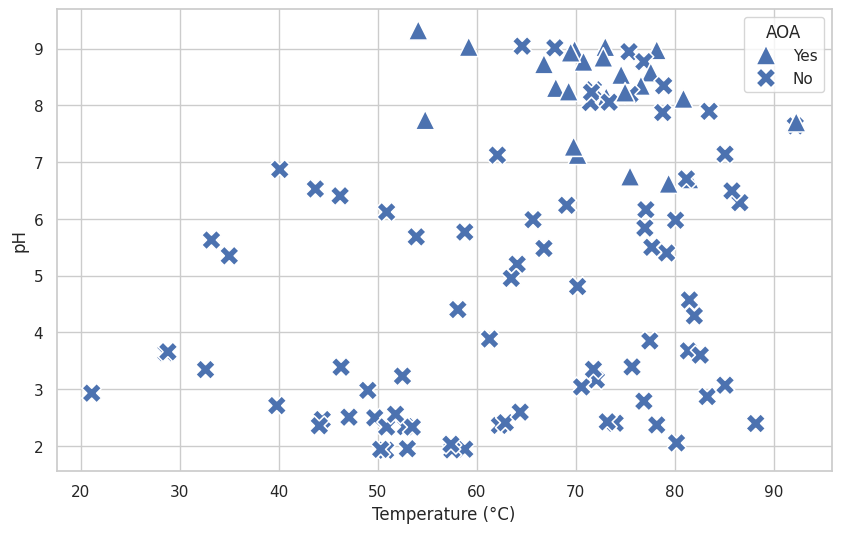

In [20]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='Temperature',
    y='pH_(input)',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,
    s = 200, #setting point size
)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('pH')

# Show the plot
plt.show()


## Figure 2B. AOA distribution as a function of pH, temperature, and the energy supply for total dissolved ammonia oxidation.

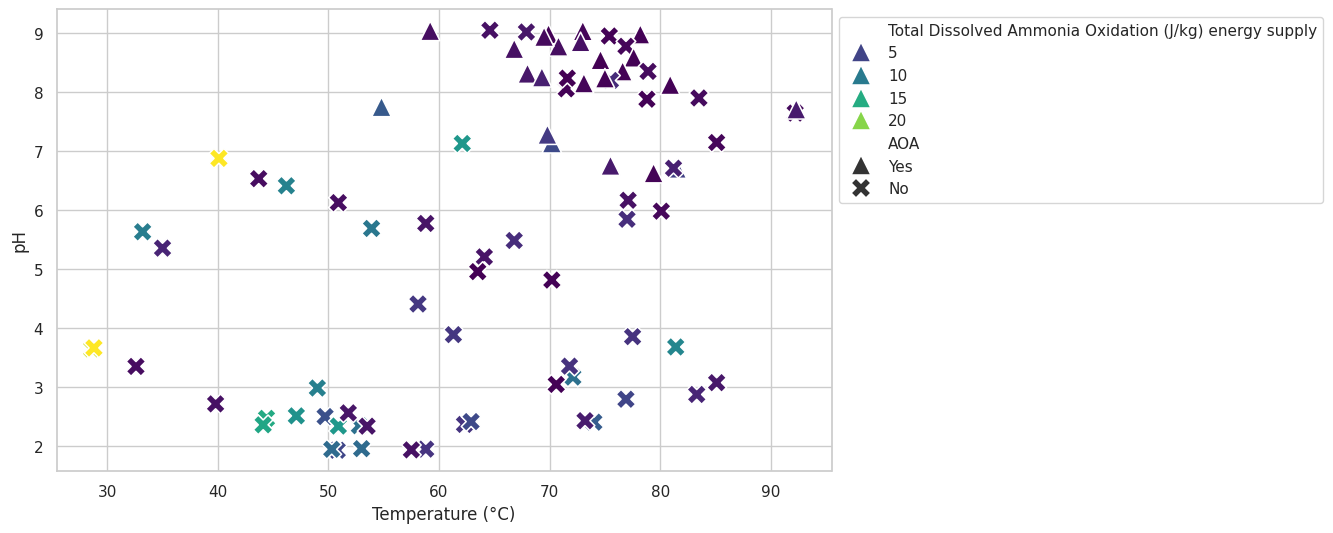

In [22]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
Figure2b = sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='Temperature',
    y='pH_(input)',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers, #Setting marker shape
    s = 200, #setting point size
    hue= 'Total Dissolved Ammonia Oxidation (J/kg) energy supply',
    palette= "viridis" #Setting color based on the energy supply
)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('pH')
sns.move_legend(Figure2b, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


# Part 3. The high energy supply for total dissolved ammonia oxidation is not reflected in the distribution of AOA. Which geochemical parameters *do* influence AOA distribution? 

Let's start by determining the limiting reactant of the total dissolved ammonia oxidation reaction. We can then plot the distribution of AOA as a function of the limiting reactant to see if the limiting reactant influences AOA distribution. 

To calculate which reactant is limiting to the reaction, we will take the log of the molality of the electron donor (total dissolved ammonia; represented by $NH_4^+$) divided by the molality of the electron acceptor ($O_2$). We also need to account for stoichiometry by dividing $O_2$ by 1.5. This written reaction looks like the following:

$$
\log_{10}\left[\frac{NH_4^+}{\frac{O_2}{1.5}}\right]
$$

Based off the chemical equation:

$$
NH_4^+ + 1.5 O_2 \rightarrow NO_2^- + H_2O + 2H^+
$$


In [23]:
# Remove rows where 'O2_(input)' or 'NH4+_(input)' are 0 so we can perform a log function
Figure_2_Data_Combined_Cut = Figure_2_Data_Combined[(Figure_2_Data_Combined['O2_(input)'] != 0) & (Figure_2_Data_Combined['NH4+_(input)'] != 0)] 

# Add a new column with the specified calculation
Figure_2_Data_Combined_Cut['Log of the limiting reactant'] = np.log10(Figure_2_Data_Combined_Cut['NH4+_(input)'] / (Figure_2_Data_Combined_Cut['O2_(input)'])/1.5)

# Display the updated DataFrame
print(Figure_2_Data_Combined_Cut.head())

     Sample  Total Dissolved Ammonia Oxidation (J/kg) energy supply  \
2  140724SD                                           6.864535        
3  140724SE                                           5.569552        
4  140725SI                                           0.926222        
5  140725SJ                                           1.148696        
6  140725SK                                           0.233910        

  Total Dissolved Ammonia Oxidation (J/kg) limiting reactant    Year  AOA  \
2                                               NH4+          2014.0  Yes   
3                                               NH4+          2014.0  Yes   
4                                               NH4+          2014.0  Yes   
5                                               NH4+          2014.0   No   
6                                               NH4+          2014.0   No   

     AOA RA  Temperature Pressure  pH_(input) HCO3-_(input)  ...  Na+_total  \
2  1.321815         54.8      1

/tmp/ipykernel_31691/1944388030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Figure_2_Data_Combined_Cut['Log of the limiting reactant'] = np.log10(Figure_2_Data_Combined_Cut['NH4+_(input)'] / (Figure_2_Data_Combined_Cut['O2_(input)'])/1.5)


## Figure 3a. AOA distribution as a function of temperature and the limiting reactant

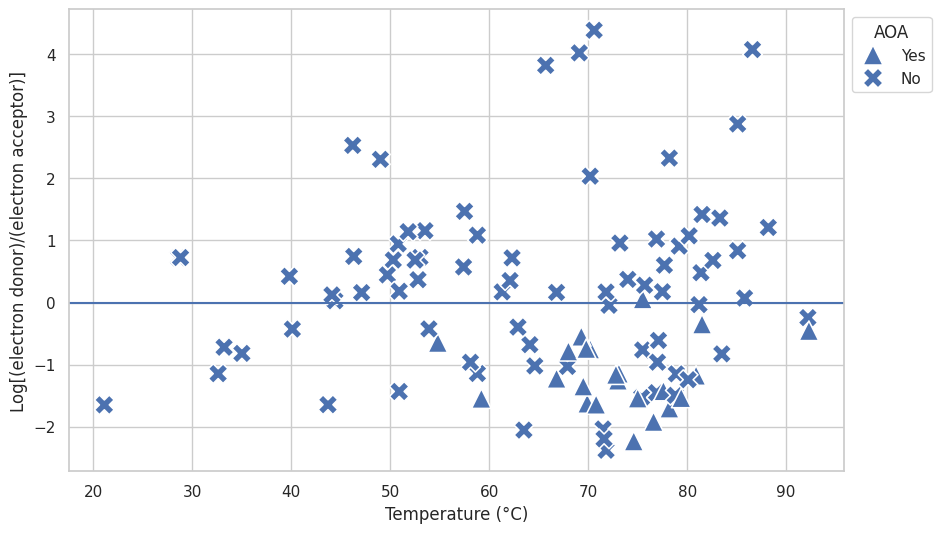

In [24]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
Figure3a = sns.scatterplot(
    data=Figure_2_Data_Combined_Cut,
    x='Temperature',
    y='Log of the limiting reactant',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers, #Setting marker shape
    s = 200, #setting point size
)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Log[(electron donor)/(electron acceptor)]')
plt.axhline(y=0)
sns.move_legend(Figure3a, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

Positive values correspond to conditions where oxygen is the limiting reactant, and negative values to those where total dissolved ammonia is limiting. The majority of samples in which AOA were detected are constrained to hot springs where total dissolved ammonia is limiting.  

## Figure 3b. AOA distribution as a function of total dissolved ammonia and $O_2$

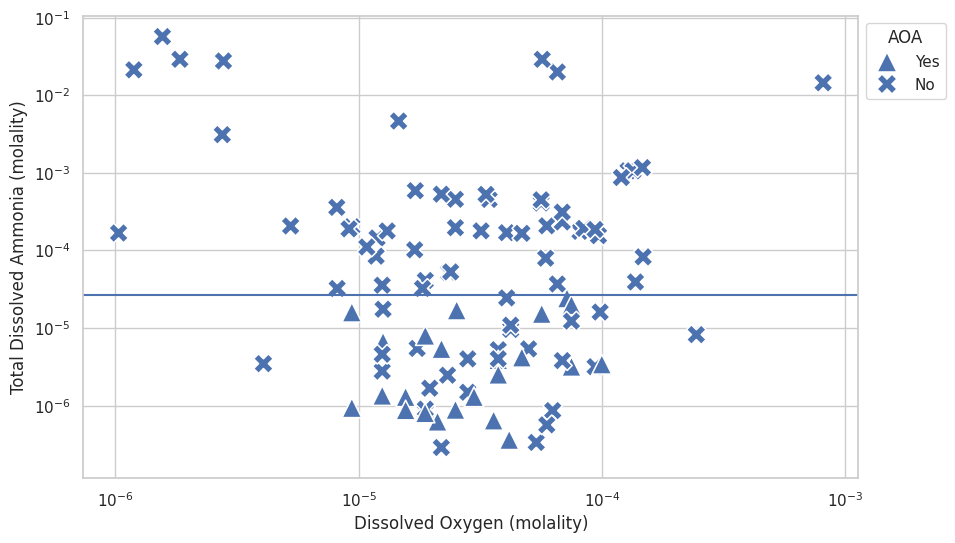

In [25]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers = {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'style' for point shapes
Figure3b = sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='O2_(input)',
    y='NH4+_(input)',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,  # Setting marker shape
    s=200  # Setting point size
)

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Dissolved Oxygen (molality)')
plt.ylabel('Total Dissolved Ammonia (molality)')
plt.axhline(y=0.0000265)

# Move the legend
sns.move_legend(Figure3b, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


AOA distribution is constrained to lower total dissolved ammonia (molality).

## Figure 3c. AOA distribution as a function of $NH_3(aq)$ and $O_2$

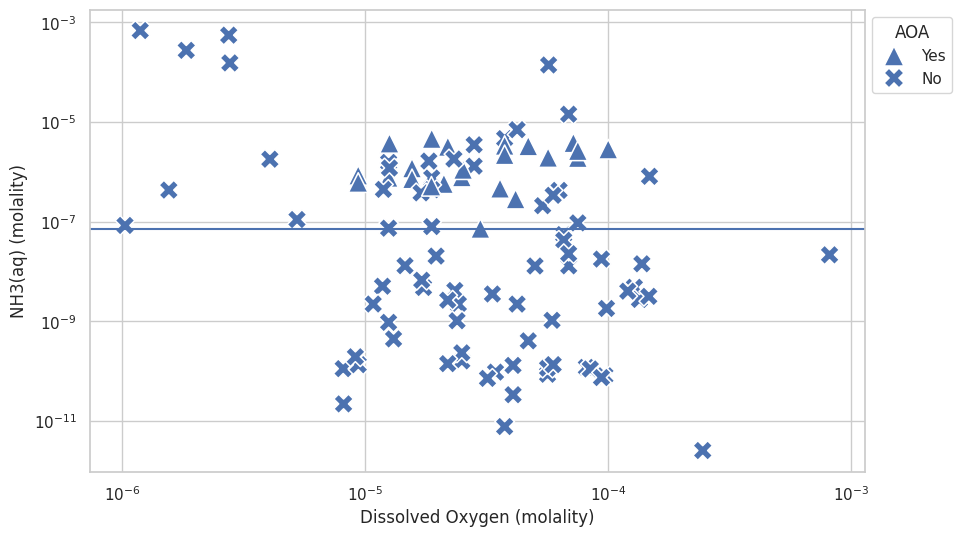

In [26]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers = {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'style' for point shapes
Figure3c = sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='O2_(input)',
    y='NH3',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,  # Setting marker shape
    s=200  # Setting point size
)

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Dissolved Oxygen (molality)')
plt.ylabel('NH3(aq) (molality)')
plt.axhline(y=0.00000007)

# Move the legend
sns.move_legend(Figure3c, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

AOA distribution is constrained to high $NH_3(aq)$ concentrations (> 0.07 μmolal).

## Figure 3d. AOA distribution as a function of $NH_4^+$ and $O_2$

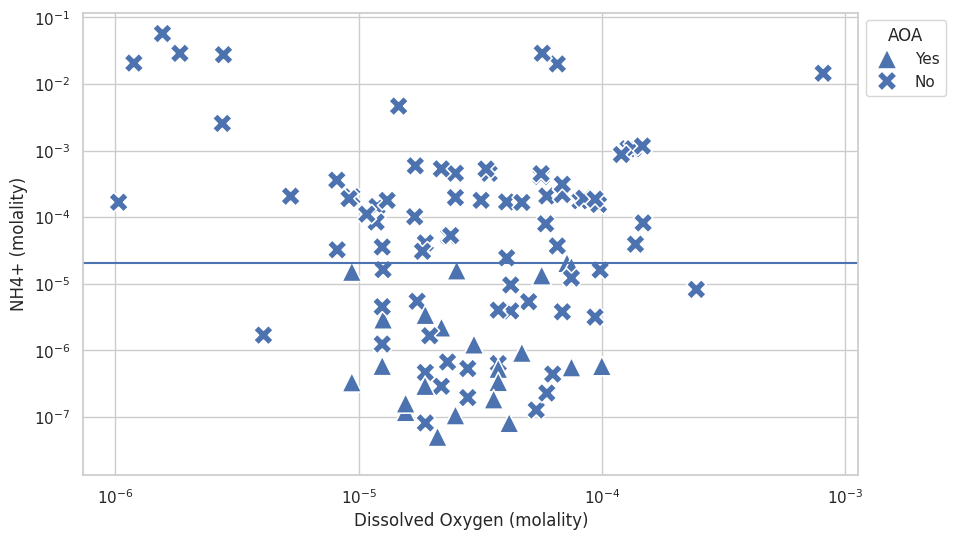

In [27]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers = {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'style' for point shapes
Figure3d = sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='O2_(input)',
    y='NH4+',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,  # Setting marker shape
    s=200  # Setting point size
)

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Dissolved Oxygen (molality)')
plt.ylabel('NH4+ (molality)')
plt.axhline(y=0.0000205)

# Move the legend
sns.move_legend(Figure3d, "upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

AOA distribution is constrained to low $NH_4^+$ concentrations (<20.5 μmolal).

Neither the distribution nor the abundance of AOA correlate with the energy supply available from total dissolved ammonia oxidation, total dissolved ammonia, or dissolved oxygen. Instead, the form that the total dissolved ammonia takes, which is predominantly $NH_4^+$ at pH values lower than the pKa and $NH_3(aq)$ at pH values higher than the pKa, has higher explanatory power for AOA distribution. Speciating total dissolved ammonia measurements to determine actual substrate availability in terms of $NH_3(aq)$ not only supports the results of in-lab experiments but has also revealed an environmental lower threshold for substrate availability for *Nitrosocaldus yellowstonensis* at 0.07 μmolality. 

# Part 4. Since it is the form that total dissolved ammonia takes ($NH_3(aq)$ vs $NH_4^+$) that influences AOA distribution, what happens if we apply the speciated forms to the energy supply calculations?

In [28]:
#Reloading required packages. 
import pandas as pd
import AqEquil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ae = AqEquil.AqEquil(exclude_organics = True)

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data.csv
wrm_data.csv is now set as the active thermodynamic database.
This database is meant for calculations between 0 and 1000 °C and up to 5 kb pressure.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding ['organic_aq', 'organic_cr'] from column category_1 in wrm_data_logk_s.csv


In [27]:
#These compounds need to be suppressed in our calculations
suppress_list = ['CN-', 'N2', 'N2O2-2', 'N2H5+', 'Fe+3', 'S3-2', 'S5-2', 'S2O3-2', 'S2-2', 'SCN-', 'SO3-2', 'HSO5-']

In [29]:
#Loading speciation file made from the Figure_2_Data_Input file
speciation = AqEquil.load("Total_Ammonia_Oxidation_Speciation.speciation")

Loaded 'Total_Ammonia_Oxidation_Speciation.speciation'


In [33]:
df_NH4 = speciation.calculate_energy(
        y_type = "E",
        y_units = "J",
        species = ["NH4+", "O2", "H+", "H2O", "NO2-"],
        stoich = [-1, -1.5, 2, 1, 1],
        as_written = True,
        rxn_name = "NH4+ Oxidation (J/kg)")

In [34]:
#Print energy calculations to a csv
df_NH4.to_csv("NH4+_Energy_Report.csv")

In [36]:
df_NH3 = speciation.calculate_energy(
        y_type = "E",
        y_units = "J",
        species = ["NH3", "O2", "H+", "H2O", "NO2-"],
        stoich = [-1, -1.5, 1, 1, 1],
        as_written = True,
        rxn_name = "NH3 Oxidation (J/kg)")

In [37]:
#Print energy calculations to a csv
df_NH3.to_csv("NH3_Energy_Report.csv")

In [38]:
#Reading in files
NH4_Energy = pd.read_csv("NH4+_Energy_Report.csv")
NH3_Energy = pd.read_csv("NH3_Energy_Report.csv")
Speciation_Data= pd.read_csv('Figure2_Data_Speciation_Report.csv')

#Merging data frames for ease of plotting
NH4_Energy_df = pd.merge(NH4_Energy, Speciation_Data , on='Sample')
NH3_Energy_df = pd.merge(NH3_Energy, Speciation_Data , on='Sample')


In [39]:
#Formatting data frames for plotting

#Removing the first row so we are only including headers and values
NH4_Energy_df = NH4_Energy_df.iloc[1:]

# List of columns to convert to float
columns = ['O2_(input)', 'NH4+ Oxidation (J/kg) energy supply']

# Convert the selected columns to floats
for c in columns:
    NH4_Energy_df[c] = NH4_Energy_df[c].astype(float)

# Display the updated DataFrame to check the changes
print(NH4_Energy_df.head())


     Sample  NH4+ Oxidation (J/kg) energy supply  \
1  140724SC                             5.248107   
2  140724SD                             5.791140   
3  140724SE                             5.036056   
4  140725SI                             0.162050   
5  140725SJ                             0.152630   

  NH4+ Oxidation (J/kg) limiting reactant    Year  AOA    AOA RA Temperature  \
1                                    NH4+  2014.0  Yes  3.137337        50.0   
2                                    NH4+  2014.0  Yes  1.321815        54.8   
3                                    NH4+  2014.0  Yes  5.339491        70.2   
4                                    NH4+  2014.0  Yes  0.156292        59.2   
5                                    NH4+  2014.0   No  0.000000        64.6   

  Pressure pH_(input) HCO3-_(input)  ... Mg+2_total  Na+_total NH4+_total  \
1      1.0      7.993      0.000425  ...   6.41e-06  0.0145001   2.29e-05   
2      1.0      7.745      0.000471  ...   6.79e-06 

In [41]:
#Formatting data frames for plotting

#Removing the first row so we are only including headers and values
NH3_Energy_df = NH3_Energy_df.iloc[1:]

# List of columns to convert to float
columns = ['O2_(input)', 'NH3 Oxidation (J/kg) energy supply']

# Convert the selected columns to floats
for c in columns:
    NH3_Energy_df[c] = NH3_Energy_df[c].astype(float)

# Display the updated DataFrame to check the changes
print(NH3_Energy_df.head())

     Sample  NH3 Oxidation (J/kg) energy supply  \
2  140724SD                            1.073395   
3  140724SE                            0.533497   
4  140725SI                            0.764171   
5  140725SJ                            0.996066   
6  140725SK                            0.211055   

  NH3 Oxidation (J/kg) limiting reactant    Year  AOA    AOA RA Temperature  \
2                                    NH3  2014.0  Yes  1.321815        54.8   
3                                    NH3  2014.0  Yes  5.339491        70.2   
4                                    NH3  2014.0  Yes  0.156292        59.2   
5                                    NH3  2014.0   No  0.000000        64.6   
6                                    NH3  2014.0   No  0.000000        75.4   

  Pressure pH_(input) HCO3-_(input)  ... Mg+2_total  Na+_total NH4+_total  \
2      1.0      7.745      0.000471  ...   6.79e-06  0.0142611   2.43e-05   
3      1.0       7.13       0.00049  ...   6.63e-06  0.0139516  

/tmp/ipykernel_31691/1567510589.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH3_Energy_df[c] = NH3_Energy_df[c].astype(float)
/tmp/ipykernel_31691/1567510589.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NH3_Energy_df[c] = NH3_Energy_df[c].astype(float)


## Figure 4a. AOA distribution as a function of $NH_4^+$ Oxidation energy supplies (cal/kg) and $O_2$ concentrations

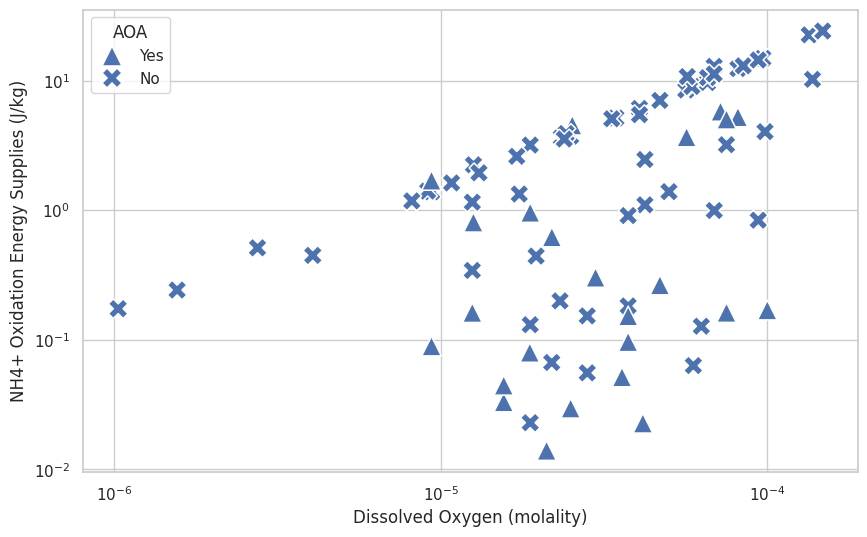

In [42]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
sns.scatterplot(
    data=NH4_Energy_df,
    x= 'O2_(input)',
    y='NH4+ Oxidation (J/kg) energy supply',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,
    s = 200, #setting point size
)

# Add labels and title
plt.xlabel('Dissolved Oxygen (molality)')
plt.ylabel('NH4+ Oxidation Energy Supplies (J/kg)')

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()

Ammonia-oxidizers are not constrained by $NH_4^+$ oxidation energy supplies.

## Figure 4b. AOA distribution as a function of $NH_3(aq)$ Oxidation energy supplies (cal/kg) and $O_2$ concentrations

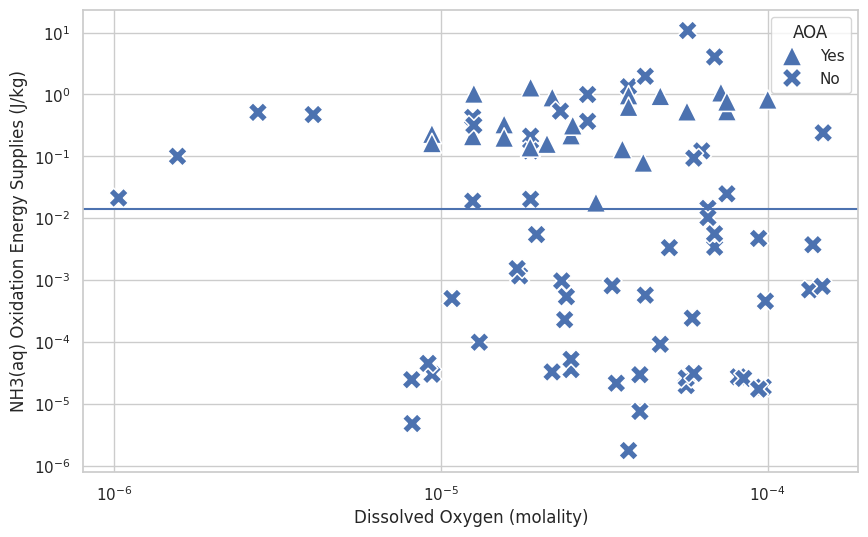

In [43]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
sns.scatterplot(
    data=NH3_Energy_df,
    x='O2_(input)',
    y='NH3 Oxidation (J/kg) energy supply',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,
    s = 200, #setting point size
)

# Add labels and title
plt.xlabel('Dissolved Oxygen (molality)')
plt.ylabel('NH3(aq) Oxidation Energy Supplies (J/kg)')

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=0.014)

# Show the plot
plt.show()

Ammonia-oxidizers are constrained to an energy supply for $NH_3(aq)$ oxidation > 0.014 J/kg.

# Part 5. If there is enough $NH_3(aq)$ and there is not too much $NH_4^+$, do we perfectly constrain for AOA?

In [44]:
#Reading in required file
Figure_2_Data_Combined = pd.read_csv("Figure_2_Data_Combined.csv")


#Reformatting
#Removing the first row so we are only including headers and values
Figure_2_Data_Combined = Figure_2_Data_Combined.iloc[1:]

# List of columns to convert to float
columns = ['NH3', 'NH4+']

# Convert the selected columns to floats
for c in columns:
    Figure_2_Data_Combined[c] = Figure_2_Data_Combined[c].astype(float)

# Display the updated DataFrame to check the changes
print(Figure_2_Data_Combined.head())

   Unnamed: 0    Sample  \
1           1  140724SC   
2           2  140724SD   
3           3  140724SE   
4           4  140725SI   
5           5  140725SJ   

  Total Dissolved Ammonia Oxidation (J/kg) energy supply  \
1                                  6.545456775131838       
2                                  6.864535192950413       
3                                  5.569551870110064       
4                                 0.9262215973875649       
5                                 1.1486960923095741       

  Total Dissolved Ammonia Oxidation (J/kg) limiting reactant    Year  AOA  \
1                                               NH4+          2014.0  Yes   
2                                               NH4+          2014.0  Yes   
3                                               NH4+          2014.0  Yes   
4                                               NH4+          2014.0  Yes   
5                                               NH4+          2014.0   No   

     AOA RA T

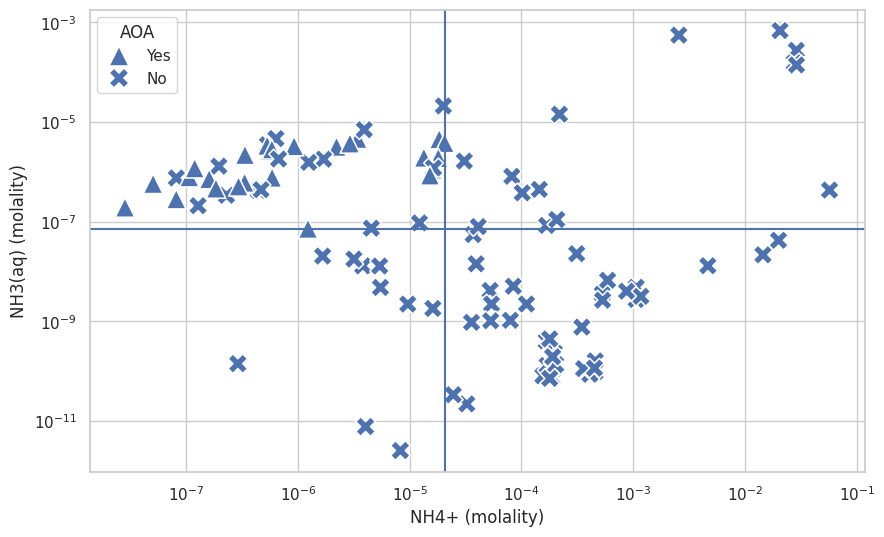

In [45]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))

#Setting marker shapes based on whether AOA were detected (Yes; triangles) or were not detected (No; 'X's)
markers= {"Yes": "^", "No": "X"}

# Plot with Seaborn, using 'hue' for point shapes
sns.scatterplot(
    data=Figure_2_Data_Combined,
    x='NH4+',
    y='NH3',
    style='AOA',  # Set different point shapes based on 'AOA'
    markers=markers,
    s = 200, #setting point size
)

# Add labels and title
plt.xlabel('NH4+ (molality)')
plt.ylabel('NH3(aq) (molality)')

# Set the x-axis and y-axis to log scale
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=0.00000007)
plt.axvline(x=0.0000205)

# Show the plot
plt.show()


Within the upper left-hand quadrant of the plot, there remain 13 samples where no AOA were detected despite sufficient $NH_3(aq)$ and tolerable NH4+ concentrations.  A potential explanation is these AOA absences are due to bioavailable copper limitations. Copper is a co-factor in the enzyme responsible for ammonia oxidation, ammonia monooxygenase, in AOA. Total copper concentrations among YNP hot springs are frequently near or below the detection limit reported by the USGS as ~8 nM concentrations. Although the copper requirements of *Ca. Nitrosocaldus* have not yet been described, the copper requirements for N. maritimus have been reported by Amin et al., (2013) to be at least 1 nM total copper. It has been established in marine settings that copper and iron abundances are key niche-defining geochemical variables for AOA. Further investigation is required to determine if the metal limitation findings from Amin et al. (2013) and Shafiee et al. (2021) are reflected in YNP hot spring AOA distributions. 

# Conclusion

Neither the presence nor the abundance of AOA among YNP hot springs correlates with the energy supply for total dissolved ammonia oxidation. By investigating the distribution of hot spring AOA as functions of speciated abundances of $NH_3(aq)$ and NH4+, a substrate threshold concentration for NH3(aq) and an apparent maximum concentration for NH4+ are identified (0.07 μmolal and 20.5 μmolal, respectively). In addition, when speciated chemical abundances are used to calculate energy supplies, we observe a significant difference in AOA distribution at the NH3 oxidation energy supply threshold of 0.017 J kg-1 water. In combination, the distribution of AOA, specifically *Ca. Nitrosocaldus*, as functions of $NH_3(aq)$ and $NH_4^+$ concentrations and speciated energy supplies, defines the niche occupied by hot spring AOA. Ammonia oxidation offers an example of how using energy supplies can be misleading when calculated using total chemical abundances. In contrast, analyzing microbial distribution in terms of speciated chemical abundances and energy supplies, rather than focusing on pH and total abundances, helps identify boundaries for microbial presence and novel insights into substrate requirements and potential inhibitions.